#**PROBLEMA DE NEGOCIO**


---




##Una entidad gubernamental responsable de la gestión de la salud en un país enfrenta el desafío de comprender y analizar la propagación del COVID-19 para tomar decisiones informadas y eficaces en la gestión de la pandemia. Como científico de datos, tu tarea es analizar los datos relacionados con el COVID-19 y presentar insights a través de visualizaciones que respondan a las siguientes preguntas clave:

### **Preguntas**

1. ¿Cómo ha evolucionado el Covid-19 en el país en comparación con el impacto observado a nivel global?

2. ¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en el país a lo largo del tiempo?

3. ¿Cuál es la evolución del índice de letalidad del Covid-19 en el país, comparado con los países con los índices históricos más elevados?

4. Desde una perspectiva demográfica, ¿cuáles son las características que tienen un mayor impacto en el índice de letalidad de un país?

5. ¿Existe otro insight que puedas proporcionar?

#**1. Configuración del Ambiente**


---

In [ ]:
# Verificar la versión de Python
!python -V
print('==============')

# Verificar versiones de las bibliotecas
print()
!pip show pandas | grep 'Name\|Version'
print('------------------')
!pip show numpy | grep 'Name\|Version'
print('------------------')
!pip show matplotlib | grep 'Name\|Version'
print('------------------')
!pip show scikit-learn | grep 'Name\|Version'

Python 3.10.12

Name: pandas
Version: 1.5.3
------------------
Name: numpy
Version: 1.23.5
------------------
Name: matplotlib
Version: 3.7.1
------------------
Name: scikit-learn
Version: 1.2.2


In [ ]:
# Importar bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from io import StringIO
import requests

#**2. Preprocesamiento de Datos**


---

In [ ]:
df_covid = pd.read_csv(StringIO(requests.get("https://covid19.who.int/WHO-COVID-19-global-data.csv").text))
df_population = pd.read_excel('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx', sheet_name=0, skiprows=16)
df_population = df_population[df_population['Year'] == 2019]

In [ ]:
# Muestra las primeras filas del DataFrame
df_covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [ ]:
# Muestra las primeras filas del DataFrame
df_population.head()

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
69,70,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,209.694,146.21,71.916,87.268,55.799,138.207,168.929,106.291,0,0
142,143,Estimates,Sub-Saharan Africa,b,1834,NaN,NaN,202.0,SDG region,1828,...,388.622,324.278,173.83,192.276,155.259,284.876,316.977,253.162,-484.702,-0.448
214,215,Estimates,Northern Africa and Western Asia,NaN,1833,NaN,NaN,747.0,SDG region,1828,...,174.739,113.261,53.27,65.448,39.486,118.468,146.064,87.691,-124.728,-0.235
286,287,Estimates,Central and Southern Asia,NaN,1831,NaN,NaN,62.0,SDG region,1828,...,227.047,168.558,75.217,90.827,58.668,161.773,190.486,131.231,-2473.484,-1.223
358,359,Estimates,Eastern and South-Eastern Asia,NaN,1832,NaN,NaN,753.0,SDG region,1828,...,145.643,86.283,47.004,58.936,34.318,100.287,128.133,71.208,-99.778,-0.043


In [ ]:
# Mostrar información general sobre el DataFrame
print('Información:')
print(df_covid.info())
print('-----------------------')

# Identificar y contar los duplicados
print('Duplicados:')
print(df_covid.duplicated().sum())
print('-----------------------')

# Identificar y contar los duplicados
print('Nulos:')
print(df_covid.isnull().sum())
print('-----------------------')

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50880 entries, 0 to 50879
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      50880 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49608 non-null  object 
 3   WHO_region         45792 non-null  object 
 4   New_cases          36622 non-null  float64
 5   Cumulative_cases   50880 non-null  int64  
 6   New_deaths         24216 non-null  float64
 7   Cumulative_deaths  50880 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB
None
-----------------------
Duplicados:
211
-----------------------
Nulos:
Date_reported            0
Country_code          1484
Country               1272
WHO_region            5088
New_cases            14258
Cumulative_cases         0
New_deaths           26664
Cumulative_deaths        0
dtype: int64
-----------------------


#

In [ ]:
# Formatear columnas de fechas
df_covid['Date_reported'] = pd.to_datetime(df_covid['Date_reported'], format='%Y-%m-%d')

# Rellenar valores nulos con ceros y convertir a enteros en columnas numericas
columnas_numericas = ['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']
df_covid[columnas_numericas] = df_covid[columnas_numericas].fillna(0).astype(int)

# Rellenar valores faltantes en la columna 'WHO_region' con 'Desconocido'
columnas_a_rellenar = ['WHO_region']
df_covid[columnas_a_rellenar] = df_covid[columnas_a_rellenar].fillna('Desconocido')

# Rellenar valores nulos con ceros y convertir a enteros
df_covid[columnas_numericas] = df_covid[columnas_numericas].fillna(0).astype(int)

# Agregar nueva columna con tasa de letalidad
df_covid['Lethality_rate'] = (df_covid['Cumulative_deaths'] / df_covid['Cumulative_cases']) * 100

# Rellenar valores nulos con ceros y convertir a float en la columna Lethality_rate
df_covid['Lethality_rate'] = df_covid['Lethality_rate'].fillna(0).astype(float)

# Eliminar registros duplicados y guardar en df_covid
df_covid = df_covid.drop_duplicates()

# Eliminar filas con valor nulo en 'Country_code'y actualizar df_covid
df_covid = df_covid.dropna(subset=['Country_code'])

# Eliminar columna WHO_region del df
df_covid = df_covid.drop(columns=['WHO_region'])

# Actualizar el índice utilizando el método reset_index
df_covid_limpio = df_covid.reset_index(drop=True)

df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49396 entries, 0 to 49395
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      49396 non-null  datetime64[ns]
 1   Country_code       49396 non-null  object        
 2   Country            49396 non-null  object        
 3   New_cases          49396 non-null  int64         
 4   Cumulative_cases   49396 non-null  int64         
 5   New_deaths         49396 non-null  int64         
 6   Cumulative_deaths  49396 non-null  int64         
 7   Lethality_rate     49396 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.0+ MB


In [ ]:
df_covid_limpio.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Lethality_rate
count,4.939600e+04,4.939600e+04,49396.000000,4.939600e+04,4.939600e+04
mean,1.567324e+04,1.643477e+06,142.040530,1.928293e+04,inf
std,2.408294e+05,7.274286e+06,875.025827,7.909933e+04,NaN
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00,0.000000e+00
25%,0.000000e+00,3.846750e+03,0.000000,2.900000e+01,3.340161e-01
50%,1.020000e+02,4.283250e+04,0.000000,4.980000e+02,1.055678e+00
75%,1.999250e+03,4.998840e+05,20.000000,6.630250e+03,2.047740e+00
max,4.047548e+07,1.034368e+08,47687.000000,1.165780e+06,inf


<Axes: >

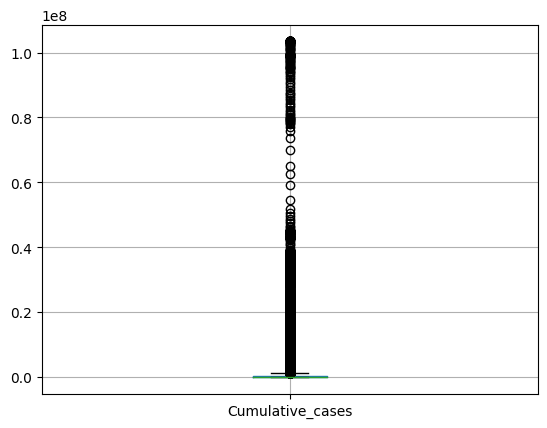

In [ ]:
# Verificar columna Cumulative_cases
df_covid_limpio.boxplot(['Cumulative_cases'])

<Axes: >

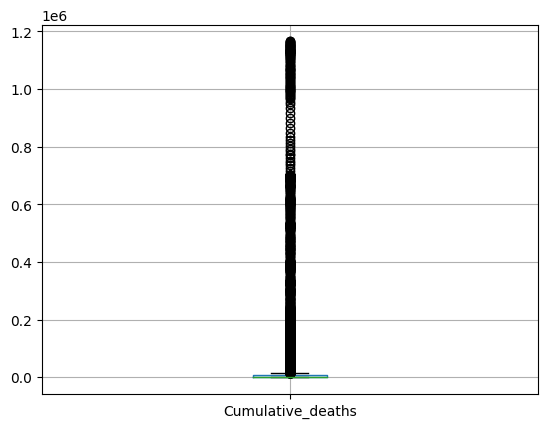

In [ ]:
# Verificar columna Cumulative_deaths
df_covid_limpio.boxplot(['Cumulative_deaths'])

<Axes: >

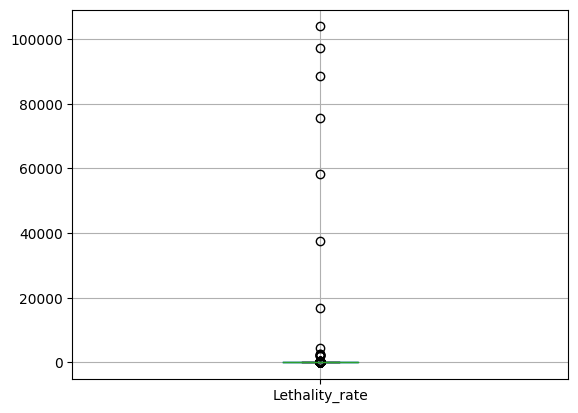

In [ ]:
# Verificar columna Lethality_rate
df_covid_limpio.boxplot(['Lethality_rate'])

In [ ]:
# Calcular los cuantiles 0.01 y 0.99 para la columna 'Lethality_rate'
percentil_01 = df_covid_limpio['Lethality_rate'].quantile(0.01)
percentil_99 = df_covid_limpio['Lethality_rate'].quantile(0.99)

# Filtrar el DataFrame para quedarse con los registros dentro del rango de cuantiles
df_covid_limpio = df_covid_limpio[(df_covid_limpio['Lethality_rate'] >= percentil_01) & (df_covid_limpio['Lethality_rate'] <= percentil_99)]

In [ ]:
df_covid_limpio.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Lethality_rate
count,4.890200e+04,4.890200e+04,48902.000000,4.890200e+04,48902.000000
mean,1.578961e+04,1.659527e+06,138.018609,1.938730e+04,1.452976
std,2.420378e+05,7.309166e+06,867.312807,7.947323e+04,1.625929
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00,0.000000
25%,0.000000e+00,3.904000e+03,0.000000,2.900000e+01,0.326607
50%,1.030000e+02,4.379300e+04,0.000000,4.710000e+02,1.029184
75%,2.005750e+03,5.070115e+05,20.000000,6.637750e+03,2.004507
max,4.047548e+07,1.034368e+08,47687.000000,1.165780e+06,12.260536


In [ ]:
df_covid_limpio.tail()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Lethality_rate
49391,2023-12-24,ZW,Zimbabwe,23,266048,1,5731,2.154123
49392,2023-12-31,ZW,Zimbabwe,23,266071,0,5731,2.153936
49393,2024-01-07,ZW,Zimbabwe,46,266117,3,5734,2.154691
49394,2024-01-14,ZW,Zimbabwe,85,266202,3,5737,2.155130
49395,2024-01-21,ZW,Zimbabwe,55,266257,0,5737,2.154685


<Axes: >

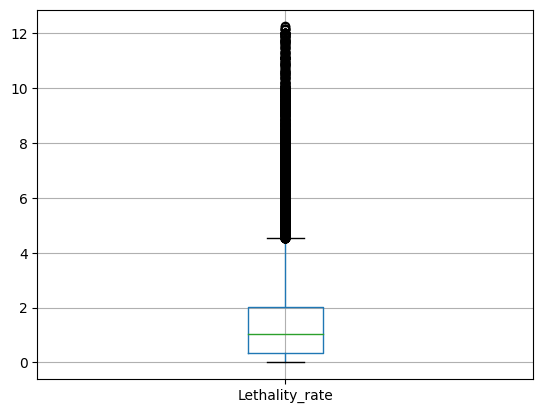

In [ ]:
# Verificar nuevamente columna Lethality_rate
df_covid_limpio.boxplot(['Lethality_rate'])

#Df_population

In [ ]:
df_population

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
69,70,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,209.694,146.21,71.916,87.268,55.799,138.207,168.929,106.291,0,0
142,143,Estimates,Sub-Saharan Africa,b,1834,NaN,NaN,202.0,SDG region,1828,...,388.622,324.278,173.83,192.276,155.259,284.876,316.977,253.162,-484.702,-0.448
214,215,Estimates,Northern Africa and Western Asia,NaN,1833,NaN,NaN,747.0,SDG region,1828,...,174.739,113.261,53.27,65.448,39.486,118.468,146.064,87.691,-124.728,-0.235
286,287,Estimates,Central and Southern Asia,NaN,1831,NaN,NaN,62.0,SDG region,1828,...,227.047,168.558,75.217,90.827,58.668,161.773,190.486,131.231,-2473.484,-1.223
358,359,Estimates,Eastern and South-Eastern Asia,NaN,1832,NaN,NaN,753.0,SDG region,1828,...,145.643,86.283,47.004,58.936,34.318,100.287,128.133,71.208,-99.778,-0.043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20305,20306,Estimates,Samoa,NaN,882,WSM,WS,882.0,Country/Area,957,...,199.759,133.625,68.304,81.648,53.949,148.134,178.682,114.303,-2.469,-11.584
20377,20378,Estimates,Tokelau,35,772,TKL,TK,772.0,Country/Area,957,...,141.052,142.411,63.07,58.218,68.146,133.511,132.832,134.951,0.113,66.637
20449,20450,Estimates,Tonga,NaN,776,TON,TO,776.0,Country/Area,957,...,245.689,169.545,97.746,114.797,81.702,194.945,232.709,156.813,-1.898,-17.923
20521,20522,Estimates,Tuvalu,NaN,798,TUV,TV,798.0,Country/Area,957,...,404.852,239.933,174.791,218.086,122.296,308.753,384.691,217.301,-0.057,-5.188


In [ ]:
# Mantener solo las columnas especificadas
columnas_deseadas = ['ISO2 Alpha-code', 'Total Population, as of 1 July (thousands)',
                     'Male Population, as of 1 July (thousands)', 'Female Population, as of 1 July (thousands)',
                     'Population Density, as of 1 July (persons per square km)',
                     'Life Expectancy at Birth, both sexes (years)']

df_population_limpio = df_population[columnas_deseadas].copy()

# Visualizar las primeras filas del DataFrame resultante
df_population_limpio.head()

,ISO2 Alpha-code,"Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Life Expectancy at Birth, both sexes (years)"
69,NaN,7764951.032,3906407.855,3858543.178,59.546,72.79
142,NaN,1080677.346,538158.386,542518.959,49.425,60.725
214,NaN,530149.56,273104.233,257045.327,42.485,73.392
286,NaN,2021559.651,1033583.865,987975.786,195.683,70.615
358,NaN,2324282.002,1176368.32,1147913.681,143.117,77.013


In [ ]:
# Eliminar registros nulos
df_population_limpio = df_population_limpio.dropna()

In [ ]:
# Renombrar las columnas del DataFrame
df_population_limpio = df_population_limpio.rename(columns={
    'ISO2 Alpha-code': 'Country_code',
    'Total Population, as of 1 July (thousands)': 'Total_Population',
    'Male Population, as of 1 July (thousands)': 'Male_Population',
    'Female Population, as of 1 July (thousands)': 'Female_Population',
    'Population Density, as of 1 July (persons per square km)': 'Population_Density',
    'Life Expectancy at Birth, both sexes (years)': 'Life_Expectancy'
})

# Visualizar las primeras filas del DataFrame resultante
df_population_limpio.head()


,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,11874.838,5894.278,5980.56,457.605,62.351
1873,KM,790.986,397.126,393.86,425.033,64.068
1945,DJ,1073.994,533.626,540.367,46.333,63.085
2017,ER,3498.818,1724.86,1773.958,28.881,67.3
2089,ET,114120.594,57375.433,56745.161,114.121,65.838


In [ ]:
# Reemplazar '...' con NaN
df_population_limpio = df_population_limpio.replace('...', np.nan)

# Convertir las columnas al tipo float
columnas_a_convertir = ['Total_Population', 'Male_Population', 'Female_Population', 'Population_Density']
df_population_limpio[columnas_a_convertir] = df_population_limpio[columnas_a_convertir].astype(float)

# Eliminar filas con valores NaN
df_population_limpio = df_population_limpio.dropna()

# Convertir las columnas al tipo int64
df_population_limpio[columnas_a_convertir] = df_population_limpio[columnas_a_convertir].astype('int64')

# Visualizar las primeras filas del DataFrame resultante
df_population_limpio.head()



,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,11874,5894,5980,457,62.351
1873,KM,790,397,393,425,64.068
1945,DJ,1073,533,540,46,63.085
2017,ER,3498,1724,1773,28,67.300
2089,ET,114120,57375,56745,114,65.838


In [ ]:
# Multiplicar por 1000 las columnas y sobreescribirlas
columnas_a_multiplicar = ['Total_Population', 'Male_Population', 'Female_Population']
df_population_limpio[columnas_a_multiplicar] *= 1000

# Eliminar registros nulos
df_population_limpio = df_population_limpio.dropna()

# Reiniciar el índice del DataFrame
df_population_limpio = df_population_limpio.reset_index(drop=True)

# Visualizar las primeras filas del DataFrame resultante
df_population_limpio.head()


,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
0,BI,11874000,5894000,5980000,457,62.351
1,KM,790000,397000,393000,425,64.068
2,DJ,1073000,533000,540000,46,63.085
3,ER,3498000,1724000,1773000,28,67.300
4,ET,114120000,57375000,56745000,114,65.838


In [ ]:
# Redondear la columna "Life_Expectancy" al entero más cercano
df_population_limpio["Life_Expectancy"] = df_population_limpio["Life_Expectancy"].astype(int)

In [ ]:
# Actualizar el índice utilizando el método reset_index
df_population_limpio = df_population_limpio.reset_index(drop=True)

In [ ]:
df_population_limpio.head()

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
0,BI,11874000,5894000,5980000,457,62
1,KM,790000,397000,393000,425,64
2,DJ,1073000,533000,540000,46,63
3,ER,3498000,1724000,1773000,28,67
4,ET,114120000,57375000,56745000,114,65


In [ ]:
df_population_limpio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country_code        235 non-null    object 
 1   Total_Population    235 non-null    int64  
 2   Male_Population     235 non-null    int64  
 3   Female_Population   235 non-null    int64  
 4   Population_Density  235 non-null    int64  
 5   Life_Expectancy     235 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 11.1+ KB


# Características demográficas más relevantes

In [ ]:
# Filtrar registros hasta '2020-12-31' y crear una copia del DataFrame filtrado
df_filtrado = df_covid_limpio[df_covid_limpio['Date_reported'] <= '2020-12-31'].copy()

# Calcular el índice de letalidad promedio por país
df_agrupado = df_filtrado.groupby(['Country_code', 'Country'], as_index=False)['Lethality_rate'].mean()

# Realizar un inner join con df_population_limpio
df_final = pd.merge(df_agrupado, df_population_limpio, on='Country_code', how='inner')

# Agregar la columna 'Lethality_rate' a df_final
df_final['Lethality_rate'] = df_agrupado['Lethality_rate']

# Seleccionar columnas numéricas relevantes para el análisis
columnas_seleccionadas = ['Lethality_rate', 'Total_Population', 'Male_Population', 'Female_Population', 'Population_Density', 'Life_Expectancy']
df_final = df_final[columnas_seleccionadas]

# Definir las características (X) excluyendo 'Lethality_rate' y la variable objetivo (y) como 'Lethality_rate'
X = df_final.drop(['Lethality_rate'], axis=1)
y = df_final['Lethality_rate']

# Inicializar y entrenar el modelo RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Calcular la importancia de las características
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Mostrar la importancia de las características
feature_importances


Life_Expectancy       0.328888
Population_Density    0.217978
Female_Population     0.189392
Male_Population       0.134456
Total_Population      0.129286
dtype: float64

# Exportar los DataFrame para analizarlos en Power Bi

In [ ]:
# Exportar df_covid_limpio a un archivo CSV
df_covid_limpio.to_csv('df_covid_limpio.csv', index=False)

# Exportar df_population_limpio a un archivo CSV
df_population_limpio.to_csv('df_population_limpio.csv', index=False)

# Exportar feature_importances
feature_importances.to_csv('feature_importances.csv')

In [ ]:
feature_importances.to_csv('feature_importances.csv', index=True, header=False, float_format='%.2f')